In [1]:
# Adapted from: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-2-connect

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
train_df = pd.read_csv("districts_data.csv")
train_df = train_df.loc[:, ~train_df.columns.str.contains('^Unnamed')]
train_df.head()

,bathrooms,bedrooms,interest_level,num_photos,num_features,num_description_words,created_month,created_day,boro_cd,price
0,1.0,2,low,6,6,131,6,1,106,3800
1,1.0,2,medium,6,6,119,6,14,106,3495
2,1.0,0,low,4,4,41,6,28,106,2795
3,1.0,3,low,5,6,132,6,28,106,7200
4,0.0,1,low,4,1,54,6,9,106,2435


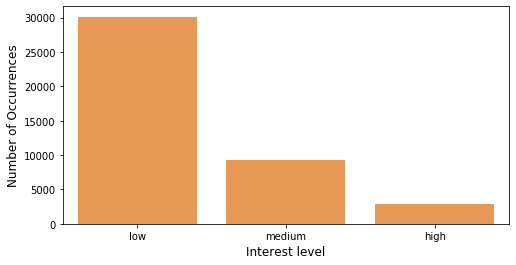

In [3]:
int_level = train_df['interest_level'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(int_level.index, int_level.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Interest level', fontsize=12)
plt.show()

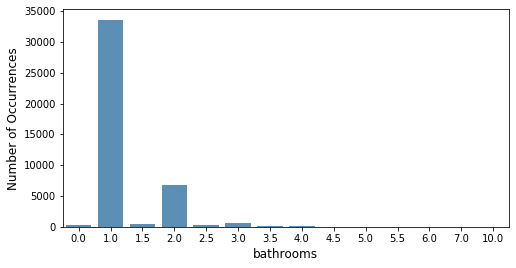

In [4]:
cnt_srs = train_df['bathrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[0])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bathrooms', fontsize=12)
plt.show()

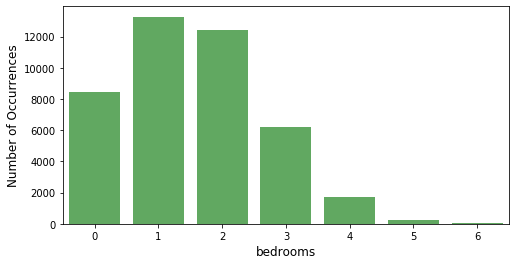

In [5]:
cnt_srs = train_df['bedrooms'].value_counts()

plt.figure(figsize=(8,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

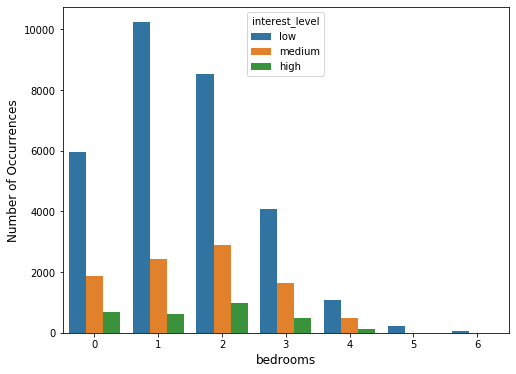

In [6]:
plt.figure(figsize=(8,6))
sns.countplot(x='bedrooms', hue='interest_level', data=train_df)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('bedrooms', fontsize=12)
plt.show()

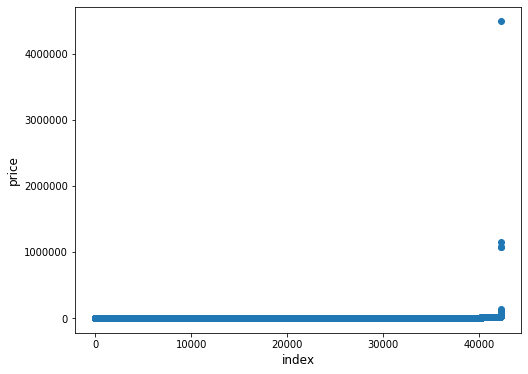

In [7]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), np.sort(train_df.price.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


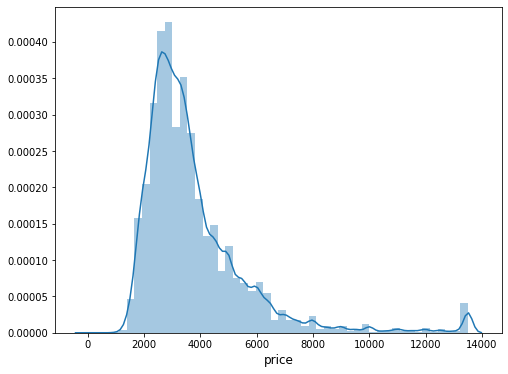

In [8]:
ulimit = np.percentile(train_df.price.values, 99)
train_df['price'].ix[train_df['price']>ulimit] = ulimit

plt.figure(figsize=(8,6))
sns.distplot(train_df.price.values, bins=50, kde=True)
plt.xlabel('price', fontsize=12)
plt.show()

In [9]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).mean()

In [10]:
# train_df[['price', 'boro_cd']].groupby(['boro_cd']).std()

In [11]:
grouped = train_df[['price', 'boro_cd']].groupby('boro_cd', group_keys=False).apply(pd.DataFrame.sample, 5, replace = True)
print(grouped.groupby(['boro_cd']).mean())
grouped.groupby(['boro_cd']).std()

# 101 	4091.498433
# 102 	4151.814392
# 103 	3687.778427
# 104 	3666.281911
# 105 	4277.266374
# 106 	3807.612296
# 107 	4230.897276
# 108 	3647.022048
# 109 	2559.476293
# 110 	2617.046452
# 111 	3071.127291
# 112 	2198.330501
# 164 	4878.125000

          price
boro_cd        
101      2848.0
102      3363.8
103      3543.0
104      5292.4
105      4696.2
106      4092.4
107      6135.0
108      3558.8
109      2389.0
110      2405.4
111      3218.0
112      2420.0
164      5276.0


,price
boro_cd,
101,374.943329
102,1025.901896
103,967.849420
104,4619.234385
105,1314.809758
106,1456.461053
107,4256.749405
108,2015.783892
109,780.852099


In [12]:
import scikits.bootstrap as bootstrap 
df = train_df[['price', 'boro_cd']]
X = df.groupby('boro_cd').apply(lambda x:bootstrap.ci(x.values, np.average))
X = X.values
X = np.array(list(X), dtype=np.float)
X

array([[2067.69908412, 2124.96408773],
       [2094.99397776, 2160.98193329],
       [1872.14016369, 1919.54019293],
       [1867.65335522, 1903.5504194 ],
       [2154.0102971 , 2230.33963538],
       [1938.96607407, 1975.166     ],
       [2134.33572807, 2204.41325327],
       [1851.51160108, 1904.1110755 ],
       [1307.11584052, 1363.24137931],
       [1325.13354839, 1410.19354839],
       [1537.62525458, 1652.56619145],
       [1135.68351742, 1175.32837723],
       [2118.25      , 2962.        ]])

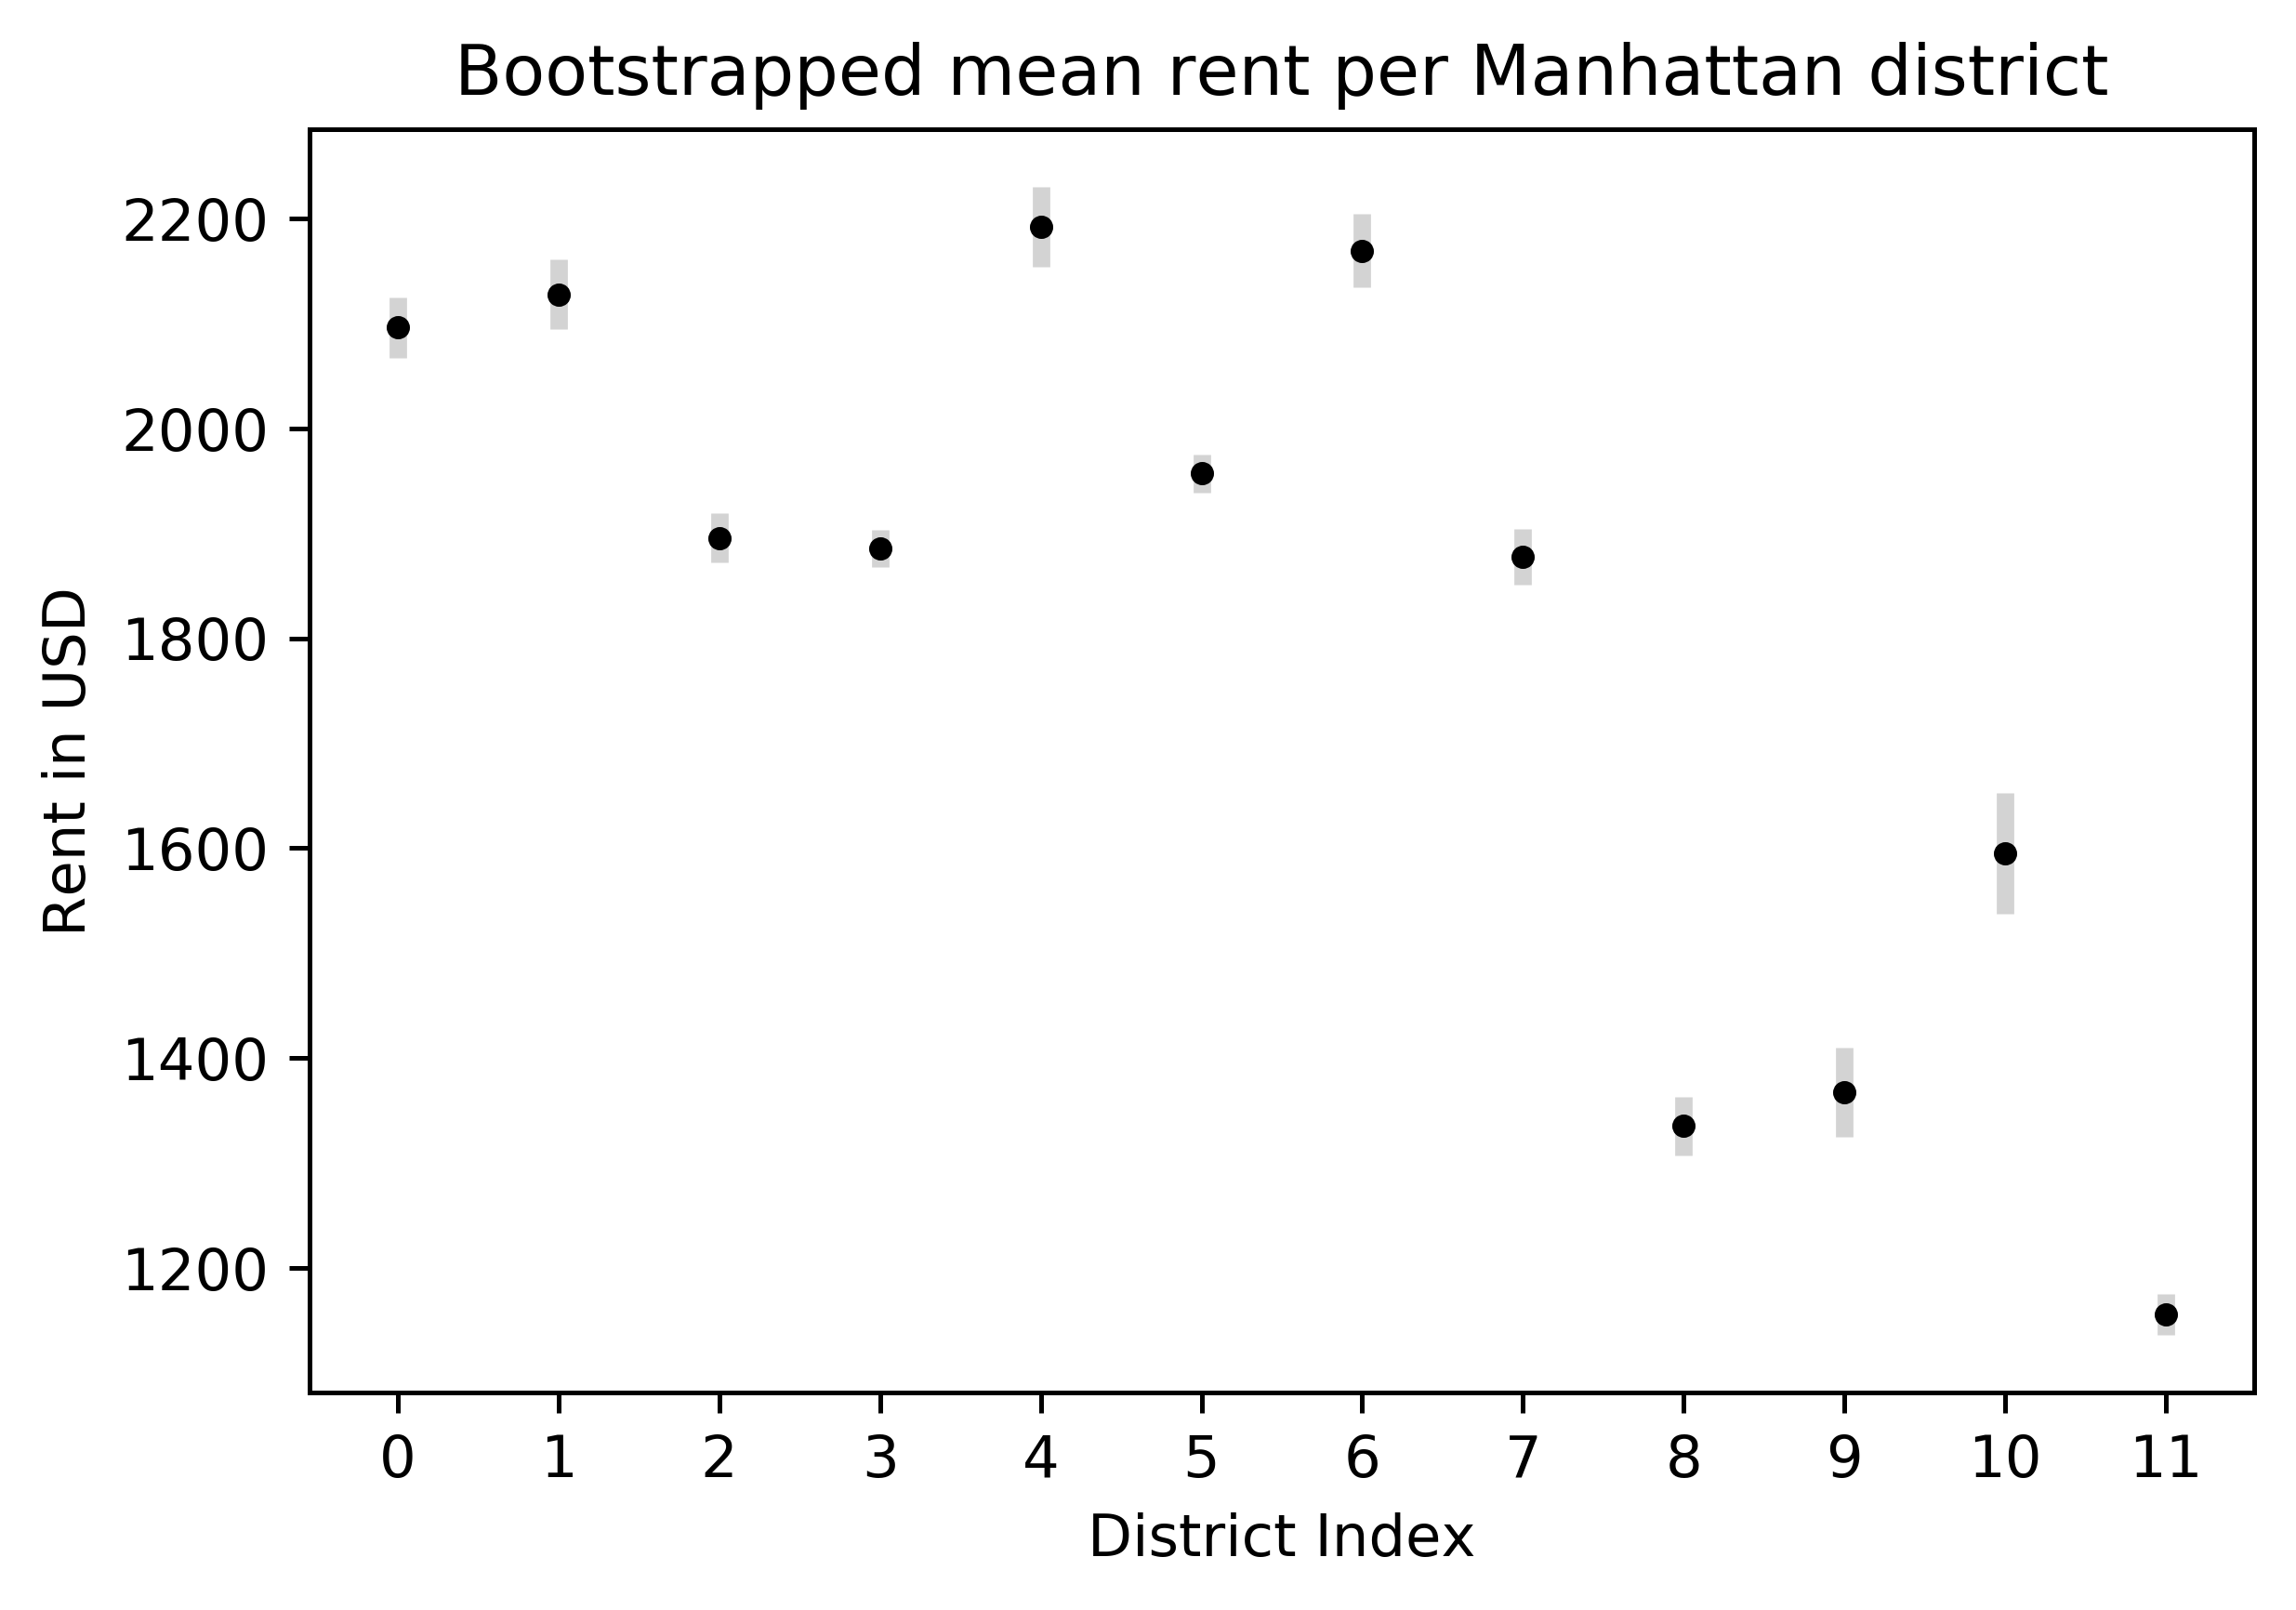

In [13]:
# bootstraps = X # All districts
bootstraps = X[:-1] # Central Park removed


from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 4), dpi=450, facecolor='w', edgecolor='k')

mean = (bootstraps[:,0] + bootstraps[:,1]) / 2
p5 = bootstraps[:,0]
p95 = bootstraps[:,1]

plt.errorbar(
    x = range(bootstraps.shape[0]),
    y = mean,
    yerr=[mean - p5, p95 - mean],
    fmt='.k',
    color='black',
    ecolor='lightgray', 
    elinewidth=3, 
    capsize=0
)

plt.title('Bootstrapped mean rent per Manhattan district')
plt.ylabel('Rent in USD')
plt.xlabel('District Index')
plt.xticks(range(bootstraps.shape[0]))
plt.show()

In [14]:
# plt.savefig('meanRentCPark.png', dpi=450)